# SHOPPING TREND ANALYSIS


### Prepare the package and upload the data set 

In [91]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 

In [92]:
# Load the data 
df = pd.read_csv('/Users/macbook/Documents/PROJECT /Shopping trend/Data Set/shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### EXPLORATORY DATA ANALYSIS (EDA)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [94]:
# For all numeric column
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [95]:
df.shape
# The data set has 3900 rows and 19 columns 

(3900, 19)

In [96]:
# Count if is there any null value in the data set 
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [97]:
# Check for the duplicated data 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

=> The data set is quite clean already, there is no null value and duplicated data in this data set 

### DATA VISUALIZATION

In [98]:
# The mean purchase amount of each category group
df.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

We can see Footwear and Clothing are the two best seller category

In [99]:
df.sort_values('Review Rating', ascending = False, inplace = True)

We can see most of the purchases has 5 star review, just some of them has 4.9/5.
But overall, the customers are satisfied with the purchase and products. 

In [100]:
# Check which season has most purchase amount 
df.groupby('Season')['Purchase Amount (USD)'].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

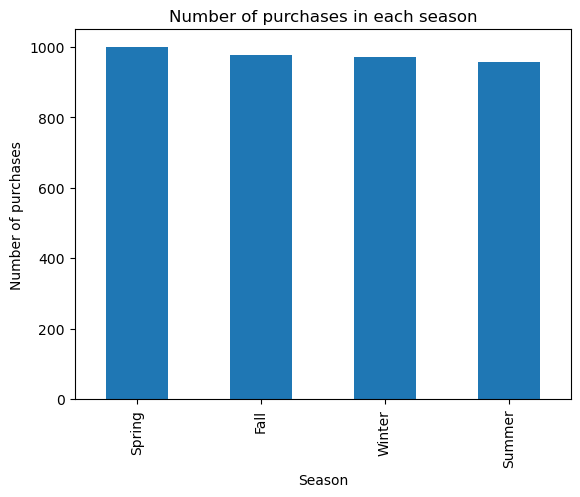

In [101]:
df['Season'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of purchases')
plt.title('Number of purchases in each season')
plt.show()

In [102]:
df['Preferred Payment Method'].value_counts()

Preferred Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

In [103]:
# Find the best 6 loction with purchase amount and the item purchased
pd.pivot_table(df, values = 'Purchase Amount (USD)', index = 'Location', columns = 'Item Purchased', aggfunc= "mean").head()

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


In [104]:
df.groupby('Payment Method')['Purchase Amount (USD)'].sum()

Payment Method
Bank Transfer    37123
Cash             38833
Credit Card      42567
Debit Card       37118
PayPal           37449
Venmo            39991
Name: Purchase Amount (USD), dtype: int64

In [105]:
# Check the mean of discount applied in the review rating 
df.groupby('Discount Applied')['Review Rating'].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

### Business Question

### 1) Aged Purchased The Item

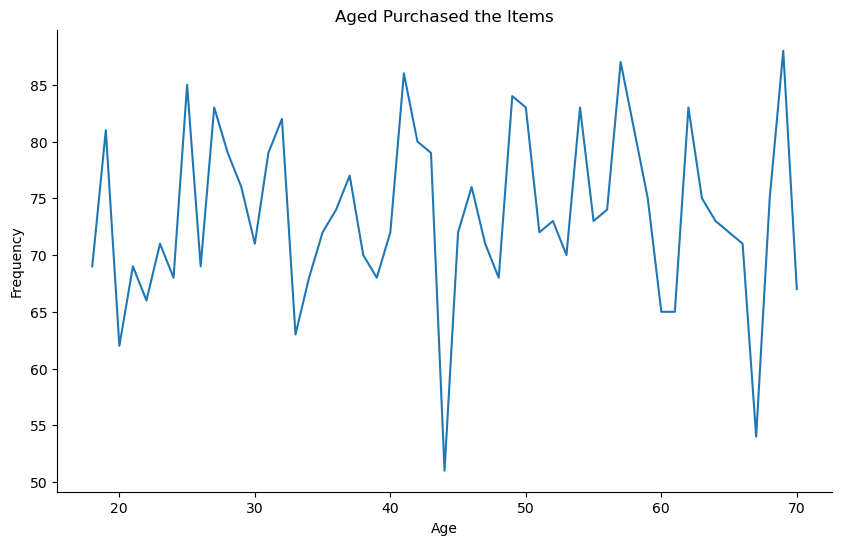

In [106]:

df_age = df['Age'].value_counts().sort_index()

# plot the diagram 
plt.figure(figsize = (10,6))
sns.lineplot(x = df_age.index, y = df_age.values)

# Adding title and label 
plt.title('Aged Purchased the Items')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid = True
sns.despine()
plt.show()


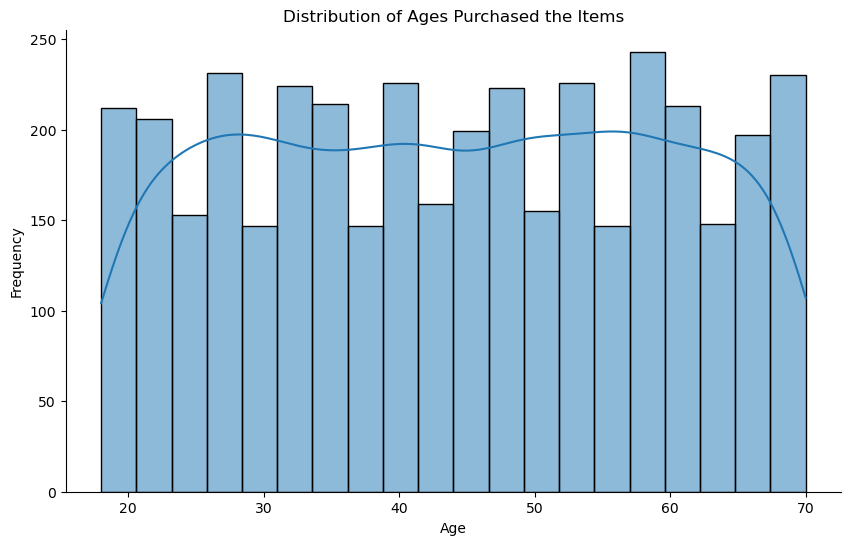

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20)

# Adding titles and labels
plt.title('Distribution of Ages Purchased the Items')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.despine()

# Display the plot
plt.show()

### 2) The Distribution of Category Purchased

/var/folders/4l/l23vkf616kdcxr3k5blmm0bw0000gn/T/ipykernel_35336/787798079.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




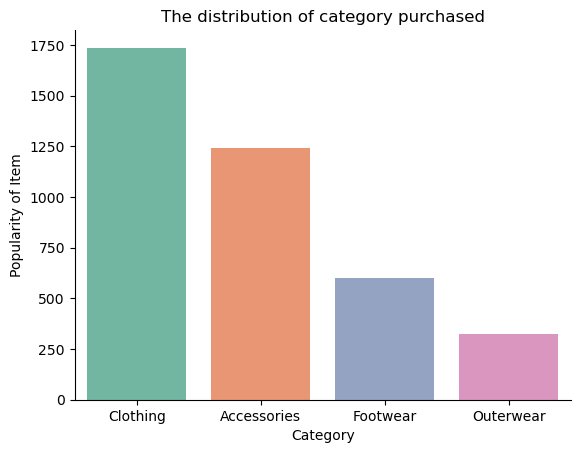

In [108]:
# Distribution of Category Purchased 
category_count = df['Category'].value_counts()

# Visualize
sns.countplot(data = df, x = 'Category', palette='Set2')
plt.ylabel('Popularity of Item')
plt.title('The distribution of category purchased')
sns.despine()
plt.show()

### 3) The most customer's common size


In [109]:
# Find which size customers buy the most 
size_count = df['Size'].value_counts()
size_count

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

/var/folders/4l/l23vkf616kdcxr3k5blmm0bw0000gn/T/ipykernel_35336/1284096405.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




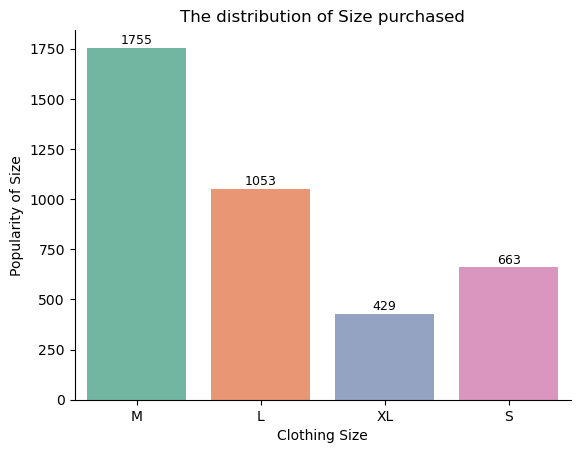

In [110]:
# Visualize
sns.countplot(data = df, x = 'Size', palette='Set2')
plt.ylabel('Popularity of Size')
plt.title('The distribution of Size purchased')
plt.xlabel('Clothing Size')
sns.despine()

# Add the count of each size beyond the bar 
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

In [111]:
# Size of Item sold in each Category
df_Size = df.groupby(['Category','Item Purchased'])['Size'].value_counts().unstack(fill_value=0).reset_index()
df_Size = df_Size.groupby('Category')

In [112]:

# Loop through each category
for c in df_Size.groups:
    # Filter data for the current category
    df_category = df_Size.get_group(c)
    
    # Melt the data to long format
    df_melted = pd.melt(df_category, id_vars=['Item Purchased'], value_vars=['L','M','S','XL'], 
                        var_name='Size', value_name='Count')

    # Plot the data
    fig = px.line(df_melted,
                  x='Item Purchased',
                  y='Count',
                  color='Size',
                  template='plotly_white',
                  markers=False,
                  labels={'value': 'Count'},
                  title=f'Count of Sizes of Items Sold in Category {c}' )

    # Show the plot
    fig.show()

### 4) What is the most common purchase color between Category

In [113]:
# Color by Category
color_cate = df.groupby('Color')['Category'].value_counts()
color_cate

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

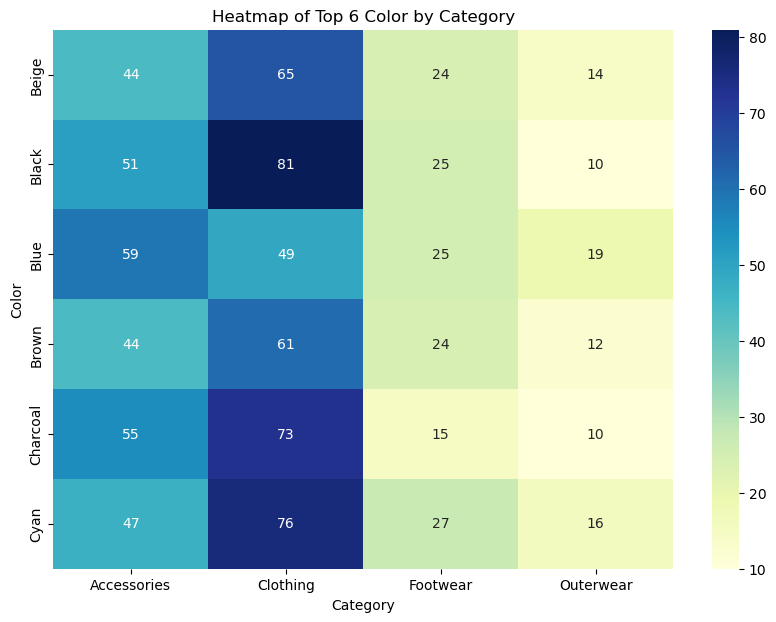

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the Series to a DataFrame with a pivot for heatmap
color_cate_df = color_cate.unstack().fillna(0)

# Plot a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(color_cate_df.head(6), annot=True, cmap='YlGnBu', fmt='g')

# Add labels and title
plt.title('Heatmap of Top 6 Color by Category')
plt.xlabel('Category')
plt.ylabel('Color')

# Show the plot
plt.show()


### 5) How many customers have the subcription status as yes?

In [115]:
# Count the number of yes and no subcription status
status = df['Subscription Status'].value_counts()
yes = status['Yes']
no = status['No']
status

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

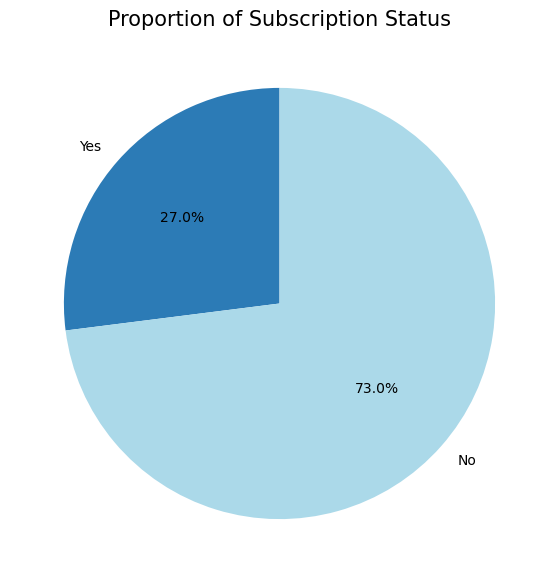

In [116]:

# Calculate the proportion of 'No' subscription status customers
status_No = (df['Subscription Status'] == 'No').sum() / df['Subscription Status'].count()

# Calculate the proportion of 'Yes' subscription status customers
status_Yes = (df['Subscription Status'] == 'Yes').sum() / df['Subscription Status'].count()

# For the pie chart
labels = ['Yes', 'No']
sizes = [status_Yes, status_No]  # Corrected variable name to 'sizes'

# Visualize
colors = ['#2c7bb6', '#abd9e9']
plt.figure(figsize=(10, 7))  # Corrected figsize argument
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors = colors)
plt.title('Proportion of Subscription Status', size = 15)
plt.show()


In [117]:
# Print
print('The number of customers with subcription is: ', yes)
print('The number of customers without subcription is: ', no)
print('The proportion of customers with subcription is: ', status_Yes)
print('The proportion of customers without subcription is: ', status_No)

The number of customers with subcription is:  1053
The number of customers without subcription is:  2847
The proportion of customers with subcription is:  0.27
The proportion of customers without subcription is:  0.73


### 6) Is there any difference between Female and Male in Shopping?


/var/folders/4l/l23vkf616kdcxr3k5blmm0bw0000gn/T/ipykernel_35336/1456124266.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




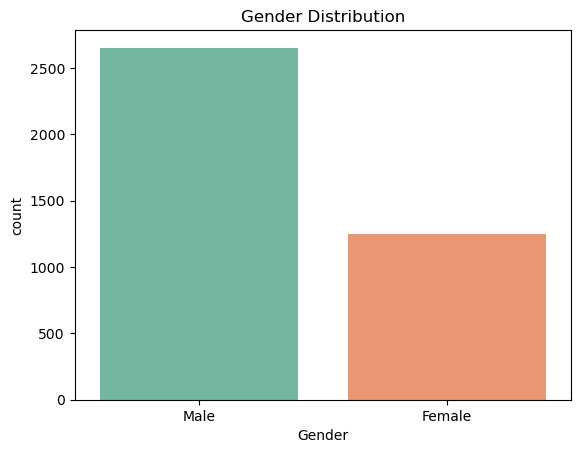

In [118]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()

/var/folders/4l/l23vkf616kdcxr3k5blmm0bw0000gn/T/ipykernel_35336/2266939087.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




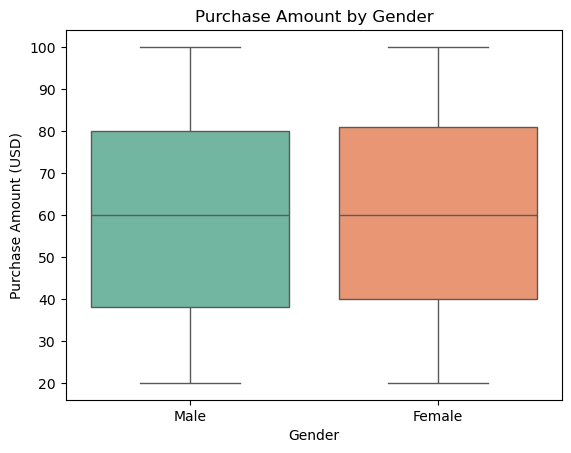

In [119]:
# Purchase Amount by Gender 
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)', palette = 'Set2')
plt.title('Purchase Amount by Gender')
plt.show()

### 7) Promo Code Used 


In [120]:
promo_code_used = df['Promo Code Used'].value_counts()
promo_code_used

Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64

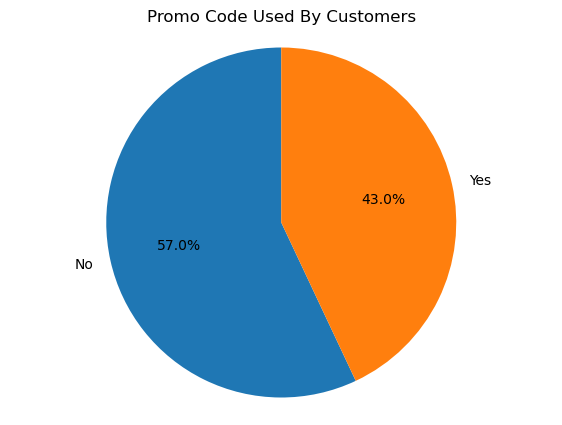

In [127]:
labels = ['No', 'Yes']

plt.figure(figsize=(7,5))
plt.pie(promo_code_used, labels = labels,  autopct='%1.1f%%', startangle=90,)
plt.title('Promo Code Used By Customers')
plt.axis('equal')
sns.despine()
plt.show()
